# Assignment 5:  Due 10/5

In this assignment you will become familiar with the Pandas library through the exploration of a Nobel prize data set. 

This data set was taken from the Kaggle website (https://www.kaggle.com/). If you are interested in data science and / or analysis, this website offers tons of data sets in various formats that you can access. They even post compititions that you can enter, some with money prizes awarded.

The libraries needed for this assignment are listed below.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook 

# 1a)

Read in the data set 'data/nobel.csv' into a DataFrame using Pandas .

In [3]:
inpath = %pwd
infile = inpath + '/data/nobel.csv'
dataFrame = pd.read_csv(infile)

# 1b)

Display below the output from the DataFrame functions *info*.

In [4]:
df_info = dataFrame.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

# 1c)

Show the first 5 listings of the dataset.

In [5]:
dataFrame.head(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


# Problem 2

How many null ('NaN') values there are in each *catagory*? What is the total number of Null values in the DataFrame?

In [6]:
dataFrame.isnull()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
907,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
908,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True


In [7]:
print("The total number of null values per category: ")
print(dataFrame.isnull().sum())
overall = dataFrame.isnull().sum().sum()
print(f'The total number of null values in the whole data frame is: {overall}')

The total number of null values per category: 
year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64
The total number of null values in the whole data frame is: 1912


# Problem 3

Make a histogram of the number of nobel prizes awarded per year. Around which decade (1900, 1910, 1920, ...) were the least amount of prizes awarded?

<IPython.core.display.Javascript object>


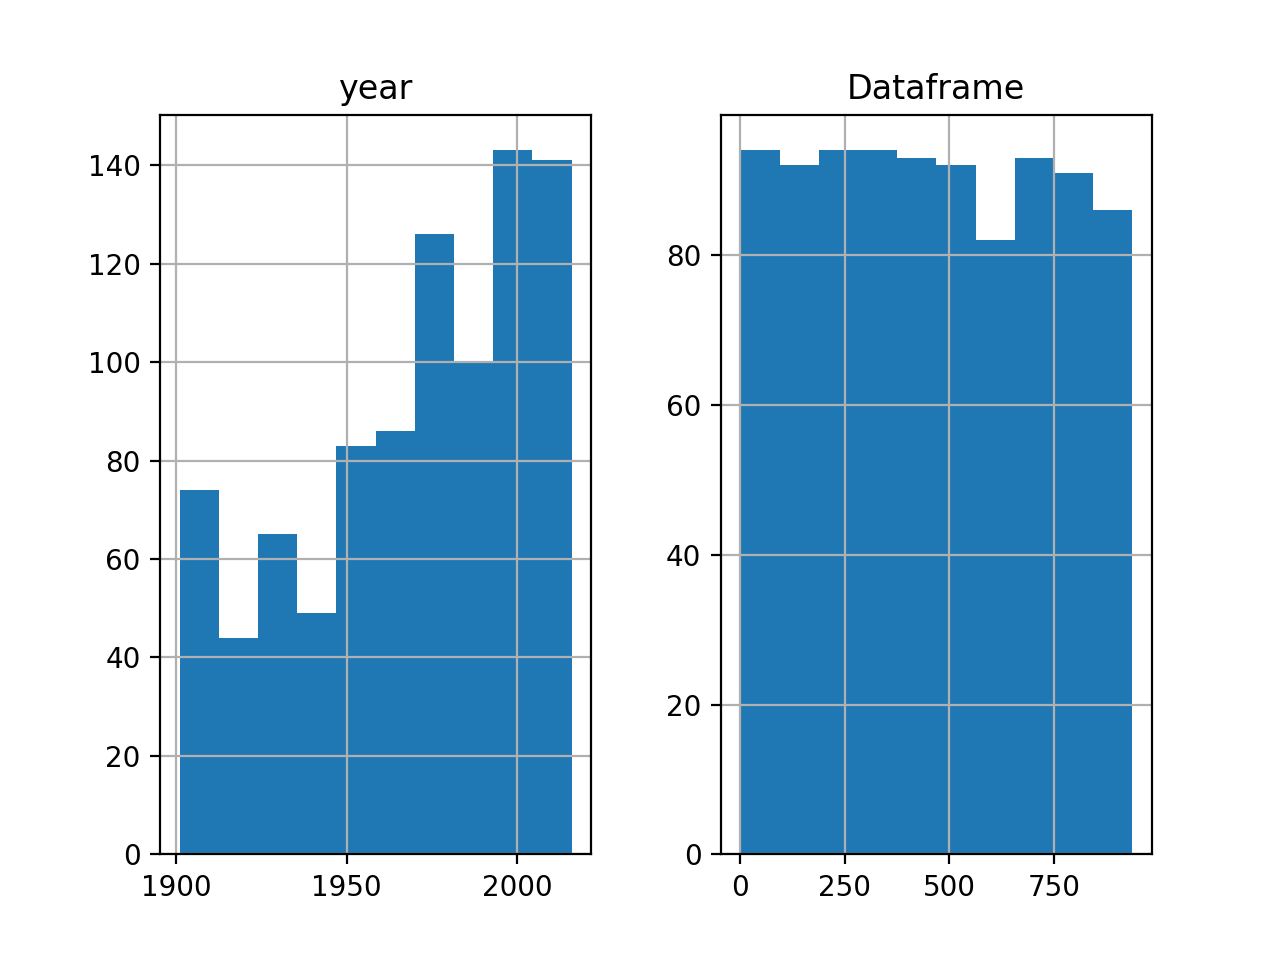

The decade with the least amount of nobel prizes awarded is the 1910s


In [8]:
ax = dataFrame.hist()
plt.title('Dataframe')
#plt.tight_layout();
print('The decade with the least amount of nobel prizes awarded is the 1910s')

# Problem 4

Use groupby method to printout the number of prizes awarded to each category. Which categroy has the most prizes?

In [9]:

dataFrame.groupby(['category']).size()


category
Chemistry     175
Economics      78
Literature    113
Medicine      211
Peace         130
Physics       204
dtype: int64

In [10]:
print('The category with the most prizes awarded is Physics!')

The category with the most prizes awarded is Physics!


# Problem 5

Find percentage of the prizes were awarded to 1, 2, 3, and 4 people? Meaning what percentage of 1/1, 1/2, 1/3, and 1/4 prize_shares are there?

In [11]:
dataFrame.groupby(['prize_share']).size()
dfSize = 344 + 306 + 201 + 60
one = 344/dfSize
two = 306 / dfSize
three = 201 / dfSize
four =  60 / dfSize
print(f'The percentage of prizes awarded to 1 person is:{one} %\nThe percentage of prizes awarded to 2 people is: {two} %\nThe percentage of prizes awarded to 3 people is: {three} %\nThe percentage of prizes awarded to 4 people is: {four} %') 

The percentage of prizes awarded to 1 person is:0.37760702524698136 %
The percentage of prizes awarded to 2 people is: 0.3358946212952799 %
The percentage of prizes awarded to 3 people is: 0.22063666300768386 %
The percentage of prizes awarded to 4 people is: 0.06586169045005488 %


# Problem 6

Determine how many males and females won the prize. Does the sum of male and female prizes add up to the total entries? If not, why?

On the same graph make histograms for the numbber of males and females that won the prize each year. 

<IPython.core.display.Javascript object>


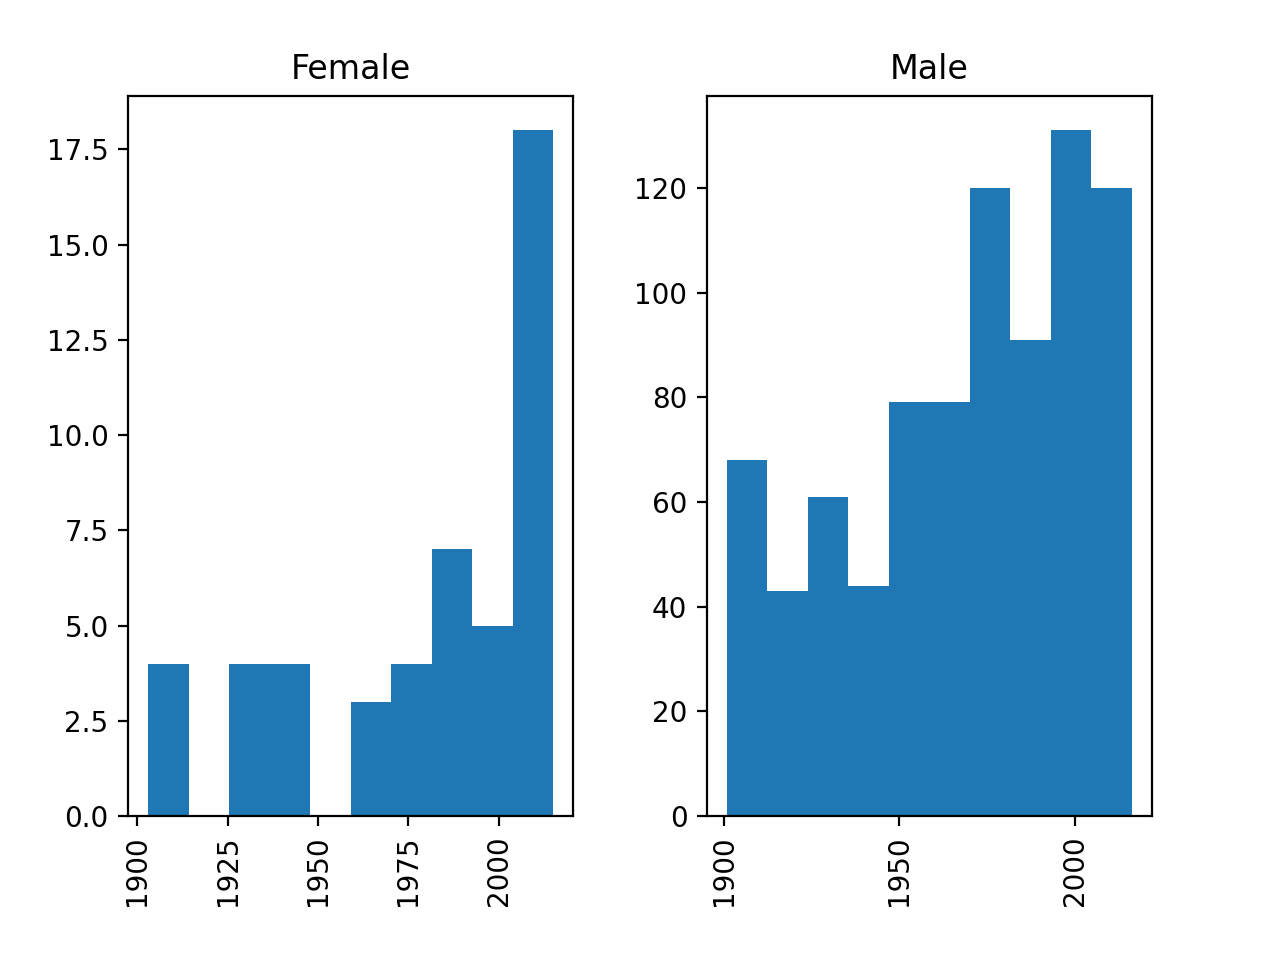

The number of female and male winners does not add up to the total entries. That could be because some people have multiple entries.


In [12]:
#dataFrame.groupby('sex').size()




dataFrame.hist(column='year', by='sex')
plt.show()

dataFrame.groupby('sex').size()
print('The number of female and male winners does not add up to the total entries. That could be because some people have multiple entries.')

# Problem 7

How many prizes were won by those whose birth country was United States of America?

In [13]:

print('Prizes won by people whose birth country was the United States of America:',dataFrame['birth_country'].value_counts()['United States of America'])

Prizes won by people whose birth country was the United States of America: 259


# Problem 8

Determine the age that each of the prize winners was when they won the prize. Find the youngest and oldest to win the prize. Find the mean age to win the prize, and the standard deviation of it. Make a histogram of the age each person was when they won the prize.

### Hint: You can use Pandas DatetimeIndex method to extract the year from the date format yyyy-mm-dd
> pd.DatetimeIndex(date).year

Where *date* is given in a formate like year-month-day, the above will returen the year, hence the *.year* in the call above. Use 'shit+tab' on pandas.DatetimeIndex to learn more.

    birth_date  year  birth_year   age
0   1852-08-30  1901      1852.0  49.0
1   1839-03-16  1901      1839.0  62.0
2   1854-03-15  1901      1854.0  47.0
3   1828-05-08  1901      1828.0  73.0
4   1822-05-20  1901      1822.0  79.0
..         ...   ...         ...   ...
906 1945-02-09  2016      1945.0  71.0
907 1951-08-10  2016      1951.0  65.0
908 1934-09-21  2016      1934.0  82.0
909 1951-09-14  2016      1951.0  65.0
910 1943-06-22  2016      1943.0  73.0

[911 rows x 4 columns]
The oldest age is: 90.0
The youngest age is: 17.0
The mean of the ages is: 59.453001132502834
The standard deviation for the ages is: 12.39929042786365


<IPython.core.display.Javascript object>


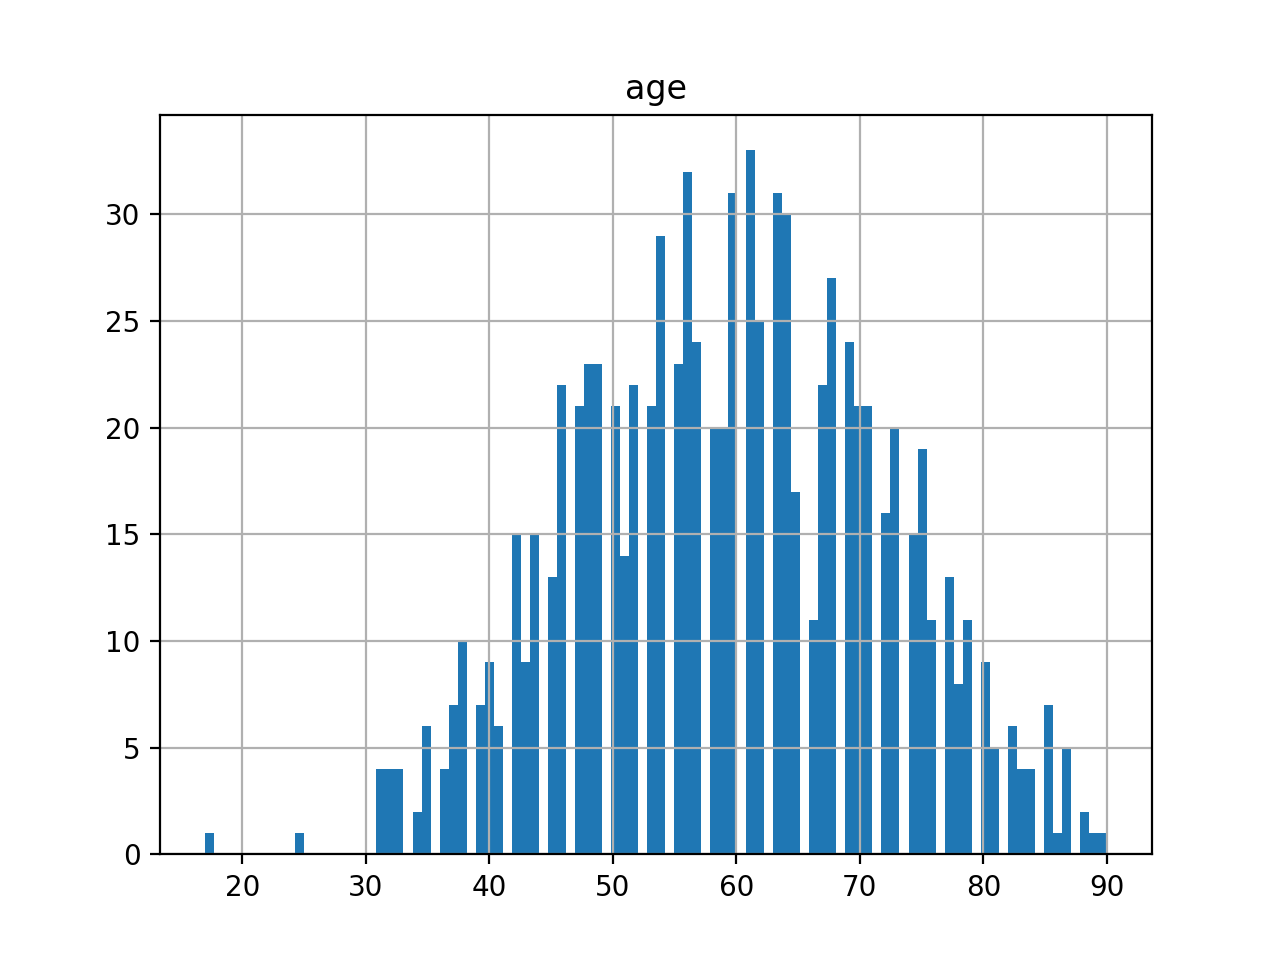

In [67]:

selected_columns = dataFrame[["birth_date", "year"]]

dff = selected_columns.copy()


from datetime import datetime, date

dff['birth_date']=pd.to_datetime(dff['birth_date'], format='%Y-%m-%d')
dff['birth_year'] = pd.DatetimeIndex(dff['birth_date']).year

def age(year, birth):
    age = birth - year
    return age

dff['age'] = age(dff['birth_year'], dff['year'])

dmax = dff['age'].max()
dmin = dff['age'].min()
std = dff['age'].std()
mean = dff['age'].mean()
print(dff)

print("The oldest age is:", dmax)
print("The youngest age is:", dmin)
print("The mean of the ages is:", mean)
print("The standard deviation for the ages is:", std)


dff.hist(column= 'age', bins = 100)
plt.show()

# Problem 9

Make a copy of the current DataFrame. Then drop the column *lauret_id* from the copied DataFrame (do this inplace so this column is gone).

In [71]:
df2 = dataFrame.copy()
df2.drop('laureate_id',inplace = True, axis = 1)
df2.head(10)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


# Problem 10

Add the age column you calculated in Problem 8 to the DataFrame.

In [72]:
df2['age']= dff['age']
df2.head(10)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,79.0
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany,56.0
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany,50.0
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany,85.0
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom,45.0
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland,69.0
